### Условие 1: Задача 1

Постройте график <br>
Назовите график <br>
Сделайте именование оси x и оси y <br>
Сделайте выводы <br>

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [42]:
data = df.groupby('price')['price'].value_counts()

Text(0.5, 1.0, 'Housing prices')

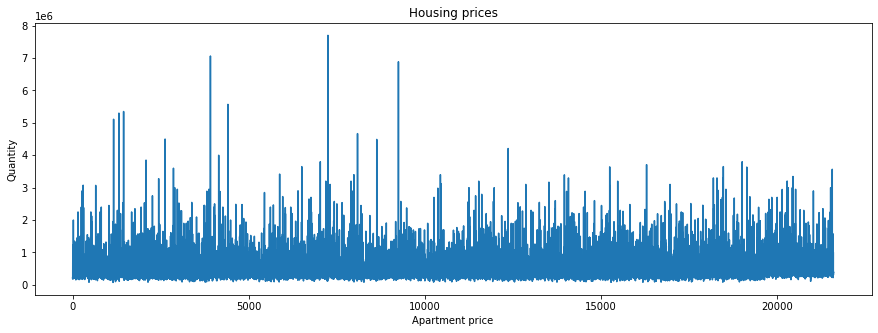

In [57]:
plt.figure(figsize=(15,5))
plt.plot(df['price'])
plt.xlabel('Apartment price')
plt.ylabel('Quantity')
plt.title('Housing prices')

##### Из графика следует, что стоимость домов пропорционален количеству, в основном по каждой цене в среднем от 1-го до 3-х домов. В промежутке от 0 до 10000 (значения на оси х), есть несколько цен домов, которому соответствуют больше всех квартир. 

Text(0.5, 1.0, 'Quadrature of the apartments (square feet)')

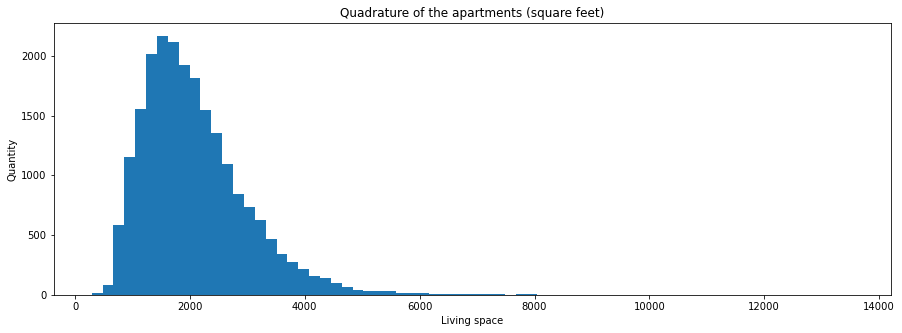

In [69]:
plt.figure(figsize=(15,5))
plt.hist(df['sqft_living'], bins = 70)
plt.xlabel('Living space')
plt.ylabel('Quantity')
plt.title('Quadrature of the apartments (square feet)')

#### Распределение квадратуры квартир, как видно из графика, ассиметричное, и в основном значения находятся до значения 4000 на оси х, и по ходу увеличения значения квадратуры, все меньше и меньше квартир, следовательно, график стремится к оси х. 

Text(0.5, 1.0, 'Apartments by year built')

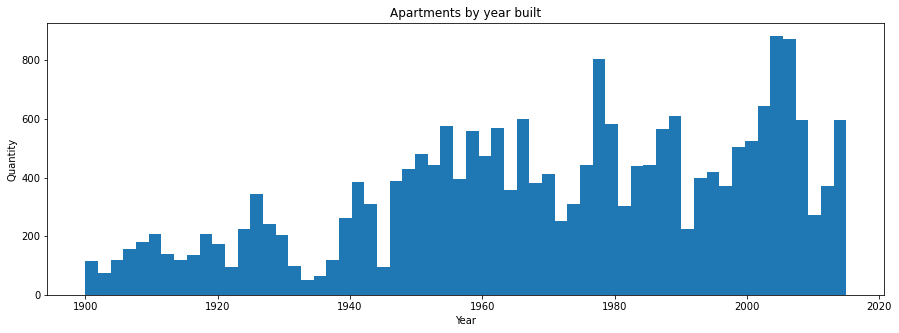

In [68]:
plt.figure(figsize=(15,5))
plt.hist(df['yr_built'], bins = 60)
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Apartments by year built')

#### Из графика видно, что больше квартир, которые былы построены позже, нежели раньше, что резонно, т.к. старые квартиры могли быть снесены и построены вместо них новые, либо же это связано с увеличением населения и следовательно, спроса на жилые помещения. Был резкий спад строительства, начиная с 1930-ых, вызванный великой депрессией, в 1945, 1973-1975, 1981-1982, 1990 годах, вызванные так же рецессиями и кризисами.

**Условие 2: 2 задача**

2.1. Изучите распределение домов от наличия вида на набережную <br>
Постройте график <br>
Сделайте выводы <br>
2.2. Изучите распределение этажей домов <br>
2.3. Изучите распределение состояния домов <br>

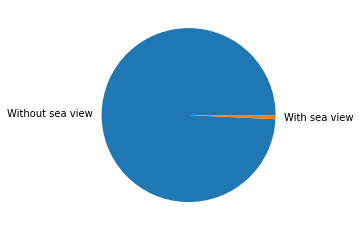

In [84]:
data = df['waterfront'].value_counts()
data1 = data.values
plt.figure()
plt.pie(data1, labels=['Without sea view', 'With sea view']);

#### Из графика видно, что есть очень маленькое количество квартир с видом на море. 

In [85]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

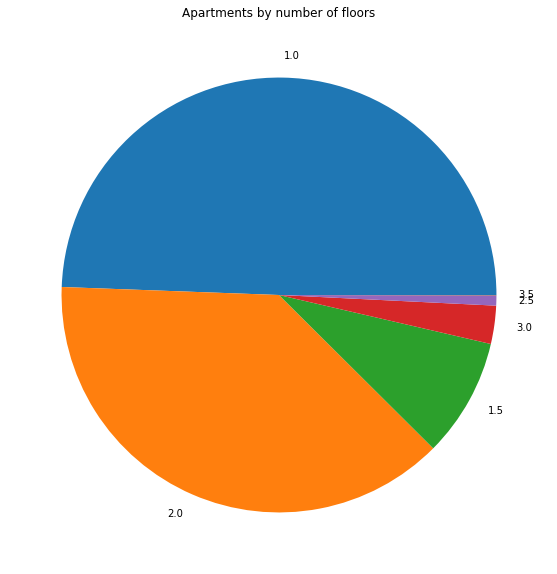

In [104]:
plt.figure(figsize=(20,10))
plt.pie(df['floors'].value_counts().values, labels = df['floors'].value_counts().index)
plt.title('Apartments by number of floors');

Почти половина домов одноэтажная, треть- двухэтажные дома.

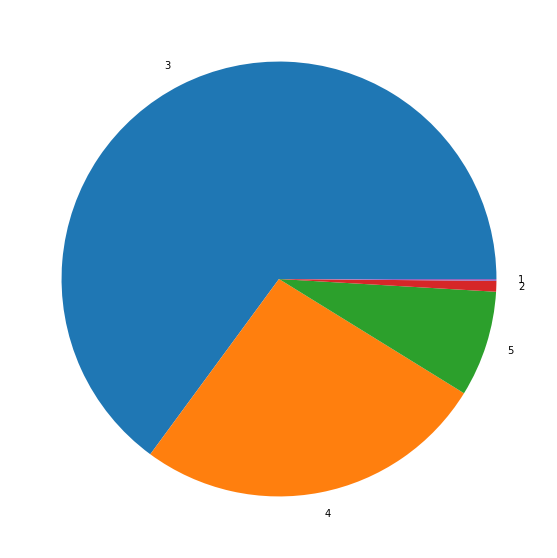

In [117]:
df['condition'].value_counts(normalize=1)
plt.figure(figsize=(15,10))
plt.pie(df['condition'].value_counts(normalize=1), labels=df['condition'].value_counts(normalize=1).index);


Больше всего домов в среднем состоянии, также много домов в хорошом и отличном состояниях, в плохом и ужасном состоянии мало домов. 

**Условие 3: 3 задача**


Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. <br>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Text(0.5, 1.0, 'Apartment price by quadrature')

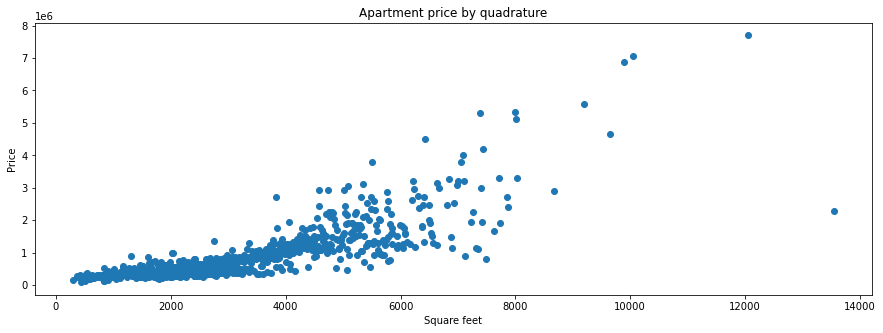

In [132]:
data = df.groupby('sqft_living')['price'].mean().reset_index()
plt.figure(figsize=(15,5))
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('Square feet')
plt.ylabel('Price')
plt.title('Apartment price by quadrature')

Цена растет в зависимости от крадратуры дома. Чем больше квадратура, тем выше цена дома. Но это, конечно, не единственный фактор влияющий на цену.

Text(0.5, 1.0, 'Apartment price by view')

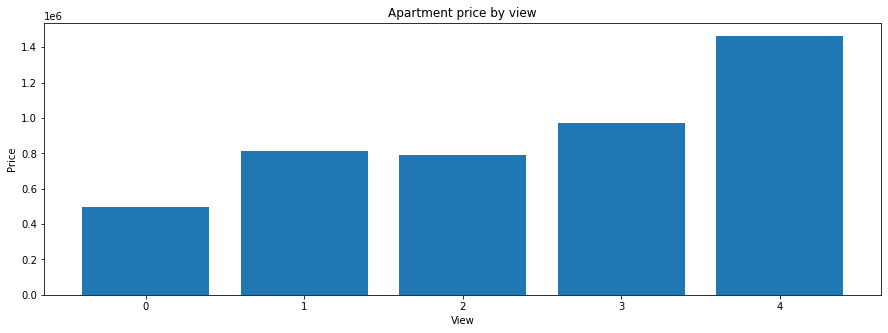

In [133]:
data = df.groupby('view')['price'].mean().reset_index()
plt.figure(figsize=(15,5))
plt.bar(data['view'], data['price'])
plt.xlabel('View')
plt.ylabel('Price')
plt.title('Apartment price by view')

Цена дома находится в прямой зависимости от вида, чем лучше вид, тем дороже дом. 

Text(0.5, 1.0, 'Apartment price by availability of sea view')

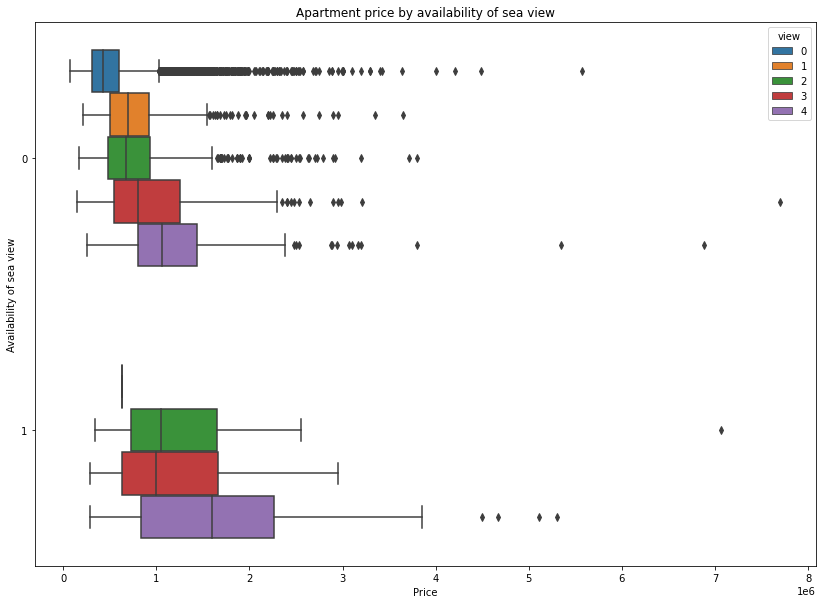

In [139]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), hue=df['view'])
plt.xlabel('Price')
plt.ylabel('Availability of sea view');
plt.title('Apartment price by availability of sea view')

Цена домов намного выше при наличии вида на море, кроме того, насколько красивый вид, настолько дороже. Кроме того, дома с отличным видом, но не на море, в 2 раза дешевле домов с отличным видом на море. 

Text(0.5, 1.0, 'Apartment price by year built')

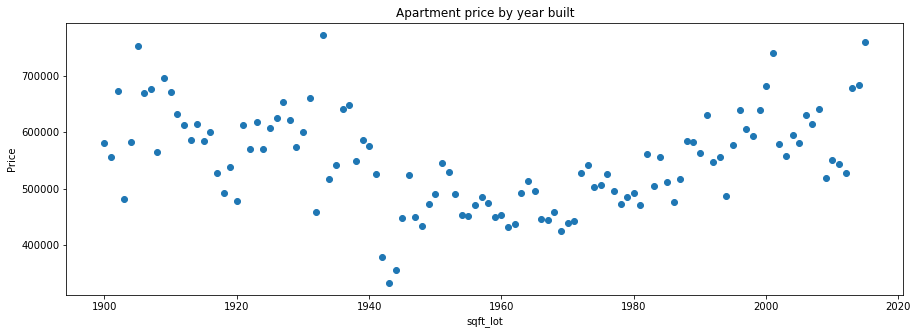

In [143]:
data = df.groupby('yr_built')['price'].mean().reset_index()
plt.figure(figsize=(15,5))
plt.scatter(data['yr_built'], data['price'])
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.title('Apartment price by year built')

Распределение цены домов в зависимости от года постройки имеет разбросанный вид. Цена на дома, построенные до 1960-их годов уменьшается, в то время как цена домов, построенных начиная с 1960-х, увеличивается, что связано с характером рынка недвижимости. Также интересно, что цены домов 1900-х и 2020-х сопоставимы, это может быть связано с другими характеристиками домов 1900-х и 2020(квадратный метр, этажи, вид и т.д.).

Text(0.5, 1.0, 'Apartment price by latitude')

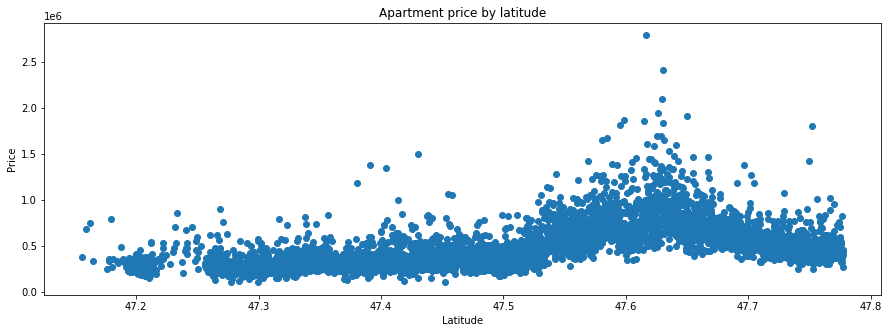

In [146]:
data = df.groupby('lat')['price'].mean().reset_index()
plt.figure(figsize=(15,5))
plt.scatter(data['lat'], data['price'])
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.title('Apartment price by latitude')

Интересная взаимосвязь наблюдается выше. Как мы видим, есть ширина, в котором стоимость домов дороже, чем при остальных - 47.5-47.7, это соответсвует штатам, близким к отлантическому океану, к столице и большим городам, как Нью-Йорк. 